# **CS 3824**
##  **Homework Assignment 5**
### Due date: November 12th, 2021

Name: <*Camille Blaine*>

PID: <*cblaine*>




##**General directions**:
 The point value of each problem is shown in [ ]. Each solution must
include all details and an explanation of why the given solution is correct. In particular, write complete sentences. A correct answer without an explanation is worth no credit. The completed assignment must be turned in as a ipynb file through Canvas by 5:00 PM on November 12th, 2021. No late homework will be accepted. 

##**Instructions**:
* Download the file and rename it into <*Your VT PID*>_solvehw5.ipbyn

* I recommend using Google Colab, but it is not required. 

* If you need new libraries to be installed, use import libararies cell below using

        !{sys.executable} -m pip install [package_name]

* Provide your codes and solutions at *#write your solution here*

* Use "Runtime -> Run all" button to run the entire note and use "Run cell" button top left of the cell to run individual cells. Don't forget run the "Import libraries" as when running individual cell. 

* *Import Libaries* will automatically download the input protein.fasta file and blast_db from github. 

* Submit your ipbyn file to convas by 5pm on November 12th, 2021. 

* Your ipbyn file will be graded based on what your notebook produces on "Runtime -> Run all". Note that the files are temporary and must be generated through cells. 

##**Objectives**
 This homework is designed for you to get familiarized with Biopython. Biopython is a large open-source application programming interface (API) used in both bioinformatics software development and in everyday scripts for common bioinformatics tasks (Cock et al. 2009, https://biopython.org/). You can reference the Biopython tutorial on the website (http://biopython.org/DIST/docs/tutorial/Tutorial.html)

##**Import Libraries**


In [1]:
import numpy as np
import sys

!{sys.executable} -m pip install Bio
import Bio
from Bio.Blast.Applications import NcbiblastpCommandline
from Bio.Align.Applications import MuscleCommandline
from Bio import Phylo
from Bio.Phylo import TreeConstruction
from Bio import AlignIO
from Bio import SeqIO

from io import StringIO

# Retrieve input data
!git clone https://github.com/YoonjinTKim/CS3824HW5.git
!unzip /content/CS3824HW5/blastp.zip
!cp /content/CS3824HW5/muscle /bin
!cp /content/blastp /bin
!chmod 755 -R /bin/muscle
!chmod 755 -R /bin/blastp


     |████████████████████████████████| 272 kB 5.2 MB/s 
     |████████████████████████████████| 2.3 MB 27.6 MB/s 
Cloning into 'CS3824HW5'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
Archive:  /content/CS3824HW5/blastp.zip
  inflating: blastp                  


##**[10] 1. Protein retrieval**

Write the function that retrieves the sequences from the fasta file and return the list of fasta SeqRecord objects using SeqIO from Biopython.

In [ ]:
def protein_sequences(fasta_file):

    sequence_file_name = fasta_file
    sequence_list = []

    #---------------------------------------------------------------------------
    #write your solution here
    
    for seq_rec in SeqIO.parse(sequence_file_name , "fasta"):
      sequence_list.append(repr(seq_rec.seq))



   

    #---------------------------------------------------------------------------
    return sequence_list

print(protein_sequences("/content/CS3824HW5/proteins.fasta"))

["Seq('MRLHHLLLVLFFVVLSAGSGFTQGVRNRLSCHRNKGVCVPSRCPRHMRQIGTCR...RKK')", "Seq('MRLHHLLLVLFFLVLSAGSGFTQGIRSRRSCHRNKGVCALTRCPRNMRQIGTCF...RKK')", "Seq('MRTSYLLLFTLCLLLSEMASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTK...CCK')", "Seq('MRTSYLLLFTLCLLLSEMASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTK...CCK')", "Seq('MRTSYLLLFTLCLLLSEIASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTK...CCK')", "Seq('MRTSYLLLFTLCLLLSEMASGDNFLTGLGHRSDHYNCVRSGGQCLYSACPIYTR...CCK')", "Seq('MRILHFLLAFLIVFLLPVPGFTAGIETSFSCSQNGGFCISPKCLPGSKQIGTCI...RKK')", "Seq('MRIHYLLFAVLFLFLMPVPGEGGIINTIQRYFCRVRGGRCAALTCLPRETQIGR...TRK')", "Seq('MKTHYFLLVMICFLFSQMEPGVGILTSLGRRTDQYKCLQHGGFCLRSSCPSNTK...CKS')", "Seq('MKTHYFLLVMLFFLFSQMELGAGILTSLGRRTDQYRCLQNGGFCLRSSCPSHTK...CRS')", "Seq('MRLHRLLLVFLLMVLLPVPGLLKNIGNSVSCLRNKGVCMPGKCAPKMKQIGTCG...KRK')", "Seq('MRLHHLLLALLFVVLSAASGFTQGVKTPQSCHRNKGVCVPIRCPRSMRQIGTCL...RRK')"]


## **[10] 2. BLAST**
 Finish the given function that runs BLAST by creating a blastp command line using NcbiblastpCommandline from Bio.Blast.Applications and print out the results of the BLAST with format 1. Name the organisms of the best matched proteins for each sequence at the text cell. Use the given {}.blastdb as a database.  

In [ ]:
def BLAST(sequence_data, blast_db_name, output_name, evalue_threshold, format):

    # Create command line blast_line for BLASTP
    #---------------------------------------------------------------------------
    #write your solution here
    blast_line = NcbiblastpCommandline(query=sequence_data, db=blast_db_name, evalue=evalue_threshold,
                                        outfmt=format, out= output_name)

    #---------------------------------------------------------------------------

    # Run blast_line 
    stdout, stderr = blast_line()

    print(stdout)

    return


BLAST("/content/CS3824HW5/proteins.fasta", "/content/CS3824HW5/blast_db", "/content/blast_output", evalue_threshold =0.001, format=1)


    p1 is Ovis aries = sheep
    p2 is Capra hircus
    p3 is Homo sapiens
    p4 is Pan troglodytes
    p5 Gorilla gorilla
    p6 is Macaca fascicularis
    p7 is Equus caballus
    p8 is Chinchilla lanigera
    p9 is Mus musculus
    p10 is Rattus norvegicus
    p11 is Sus scrofa
    p12 is Rangifer tarandus



##**[10] 3. MUSCLE**

Finish the given function that creates command that runs MUSCLE for given protein list using MuscleCommandline from Bio.Align.Applications and storethe results in the output file as clw=True format. Print out the results in the console. 

In [ ]:
def MUSCLE(input_file, output_file):
    muscle_exe = "/bin/muscle"
  
    # Run MUSCLE 
    # Create command line muscle_line for MUSCLE
    #---------------------------------------------------------------------------
    #write your solution here
    muscle_line = MuscleCommandline(input=input_file, out=output_file, clw=True)
    #---------------------------------------------------------------------------
    # Run muscle_line 
    stdout, stderr = muscle_line()

    with open(output_file) as file:
        print(file.read())
    return

MUSCLE("/content/CS3824HW5/proteins.fasta", "/content/muscle_output.aln")


MUSCLE (3.8) multiple sequence alignment


P6              MRTSYLLLFTLCLLLSEMASGDNFLTGLGHRSDHYNCVRSGGQCLYSACPIYTRIQGTCY
P5              MRTSYLLLFTLCLLLSEIASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTKIQGTCY
P3              MRTSYLLLFTLCLLLSEMASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTKIQGTCY
P4              MRTSYLLLFTLCLLLSEMASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTKIQGTCY
P9              MKTHYFLLVMICFLFSQMEPGVGILTSLGRRTDQYKCLQHGGFCLRSSCPSNTKLQGTCK
P10             MKTHYFLLVMLFFLFSQMELGAGILTSLGRRTDQYRCLQNGGFCLRSSCPSHTKLQGTCK
P8              MRIHYLLFAVLFLFLM---PVPGEGGIINT-IQRYFCRVRGGRCAALTCLPRETQIGRCS
P7              MRILHFLLAFLIVFLL---PVPGFTAGIET---SFSCSQNGGFCISPKCLPGSKQIGTCI
P11             MRLHRLLLVFLLMVLL---PVPGLLKNIGN---SVSCLRNKGVCMPGKCAPKMKQIGTCG
P12             MRLHHLLLALLFVVLS---AASGFTQGVKT---PQSCHRNKGVCVPIRCPRSMRQIGTCL
P1              MRLHHLLLVLFFVVLS---AGSGFTQGVRN---RLSCHRNKGVCVPSRCPRHMRQIGTCR
P2              MRLHHLLLVLFFLVLS---AGSGFTQGIRS---RRSCHRNKGVCALTRCPRNMRQIGTCF
                *.   :*:  : ..:  

##**[40] 4. Tree**

Based on results from *problem 3 muscle_output.aln*, create the distance phylogenetic tree and distance matrix using Bio.Phylo and AlignIO. (1) Print out the distance matrix of alignemnt, (2) save phylogenetic tree in xml (phyloxml)and cluster alignment in phy (phylip) as output files, and (3) display tree using Phylo.draw function.

P6	0
P5	0.08450704225352113	0
P3	0.07042253521126762	0.028169014084507005	0
P4	0.07042253521126762	0.014084507042253502	0.014084507042253502	0
P9	0.49295774647887325	0.49295774647887325	0.47887323943661975	0.47887323943661975	0
P10	0.5070422535211268	0.5070422535211268	0.49295774647887325	0.49295774647887325	0.11267605633802813	0
P8	0.7323943661971831	0.7323943661971831	0.7323943661971831	0.7323943661971831	0.7746478873239436	0.7464788732394366	0
P7	0.7183098591549295	0.704225352112676	0.704225352112676	0.704225352112676	0.7183098591549295	0.6901408450704225	0.5211267605633803	0
P11	0.6901408450704225	0.6901408450704225	0.6901408450704225	0.6901408450704225	0.6901408450704225	0.6901408450704225	0.6056338028169015	0.43661971830985913	0
P12	0.6619718309859155	0.676056338028169	0.6901408450704225	0.676056338028169	0.7605633802816901	0.704225352112676	0.619718309859155	0.47887323943661975	0.43661971830985913	0
P1	0.647887323943662	0.6619718309859155	0.676056338028169	0.6619718309859155	0.7

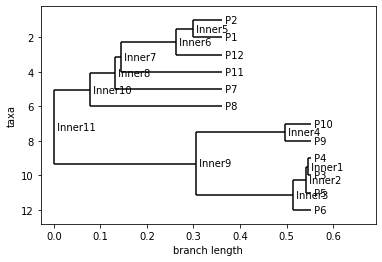

In [ ]:
def TREE(muscle_output, phy_output_file, xml_output_file):

    # Create identity matrix from MUSCLE 
    #---------------------------------------------------------------------------
    #write your code here
    # TODO print out the distance matrix from MUSCLE 
    # TODO write alignment from MUSCLE into phy output file in phylip format
    with open(muscle_output, "r") as alignfile :
      align= AlignIO.read(alignfile, "clustal")
    #---------------------------------------------------------------------------
    constructor = TreeConstruction.DistanceTreeConstructor()
    calculator = TreeConstruction.DistanceCalculator('identity')
    matrix = calculator.get_distance(align)
    print(matrix)
    


    # Create and draw phylogenetic tree
    #---------------------------------------------------------------------------
    upTree = constructor.upgma(matrix)
    
    AlignIO.write(align, phy_output_file, "phylip")
    Phylo.write(upTree, xml_output_file, "phyloxml")
    # TODO construct phylogenetic tree and display 
    Phylo.draw(upTree)
    
    #---------------------------------------------------------------------------
    
    return 
   
TREE("muscle_output.aln", "/content/alignment.phy", "/content/tree.xml")


##**[10] 5. Taxonomy**

Based on matrix from *Problem 4*, name the best identity match for each protein sequence based on the matrix in the text cell above.


    p6 has the best identity matches with p3 and p4.
    p5 has the best identity match with p4.
    p3 has the best identity match with p4.
    p4 has the best identity match with p5 and p3.
    p9 has the best identity match with p10.
    p10 has the best identity match with p9.
    p8 has the best identity match with p7.
    p7 has the best identity match with p11.
    p11 has the best identity match with p1.
    p12 has the best identiy match with p1.
    p1 has the best identity match with p2.
    p2 has the best identity match with p1.
    





